In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('text_preprocessing/final_dataset.csv')

# Konversi sentimen positif = 1, negatif = 0
df['label_sentimen'] = df['Sentiment'].apply(lambda x: 1 if x == "positive" else 0)

# Vektorisasi text menggunakan TF-IDF
X = df['tweet_tokens_stemmed']
y = df['label_sentimen']
vectorizer = TfidfVectorizer(smooth_idf=True)
X = vectorizer.fit_transform(X)

In [19]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Inisialisasi model
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB()
}

# Inisialisasi untuk menyimpan hasil
cv_results = {
    model_name: {
        'accuracyTrain': [], 'accuracyTest': [],
        'precisionTrain': [], 'precisionTest': [],
        'recallTrain': [], 'recallTest': [],
        'y_test_all': [], 'y_predTest_all': [],
        'y_train_all': [], 'y_predTrain_all': []
    }
    for model_name in models
}

Evaluating MultinomialNB
Fold 1 - MultinomialNB:
  Accuracy Test: 0.7750
  Precision Test: 0.7933
  Recall Test: 0.7750
  Accuracy Train: 0.9833
  Precision Train: 0.9839
  Recall Train: 0.9833
--------------------------------------------------
Fold 2 - MultinomialNB:
  Accuracy Test: 0.7750
  Precision Test: 0.7933
  Recall Test: 0.7750
  Accuracy Train: 0.9806
  Precision Train: 0.9813
  Recall Train: 0.9806
--------------------------------------------------
Fold 3 - MultinomialNB:
  Accuracy Test: 0.8000
  Precision Test: 0.8125
  Recall Test: 0.8000
  Accuracy Train: 0.9778
  Precision Train: 0.9783
  Recall Train: 0.9778
--------------------------------------------------
Fold 4 - MultinomialNB:
  Accuracy Test: 0.6500
  Precision Test: 0.7000
  Recall Test: 0.6500
  Accuracy Train: 0.9889
  Precision Train: 0.9891
  Recall Train: 0.9889
--------------------------------------------------
Fold 5 - MultinomialNB:
  Accuracy Test: 0.9250
  Precision Test: 0.9261
  Recall Test: 0.9250


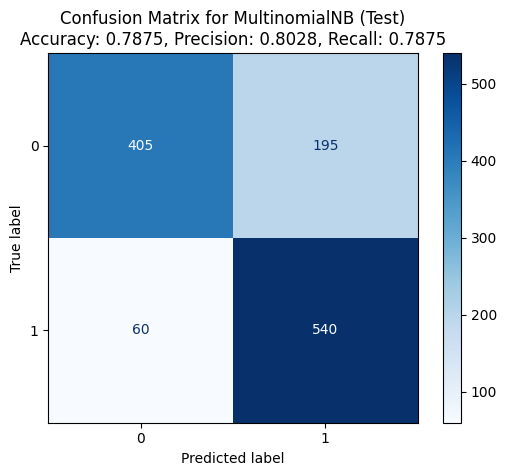

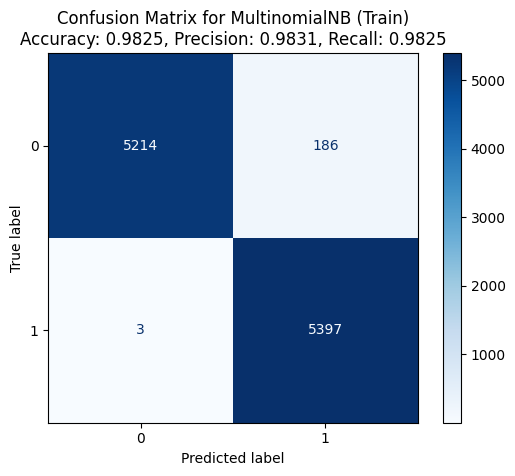

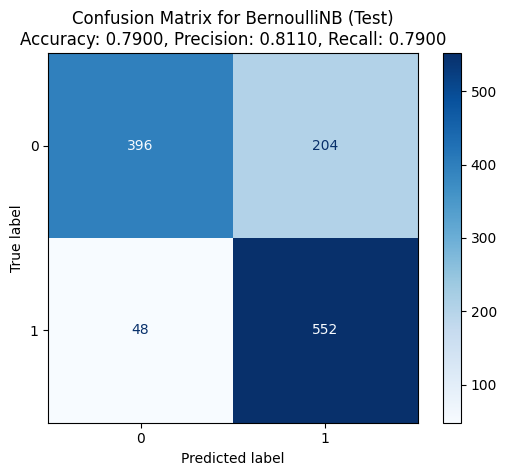

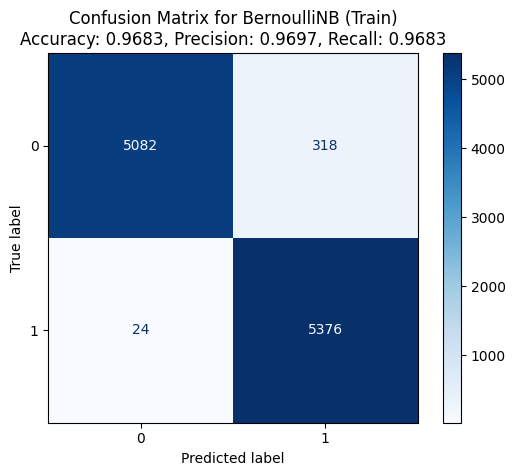

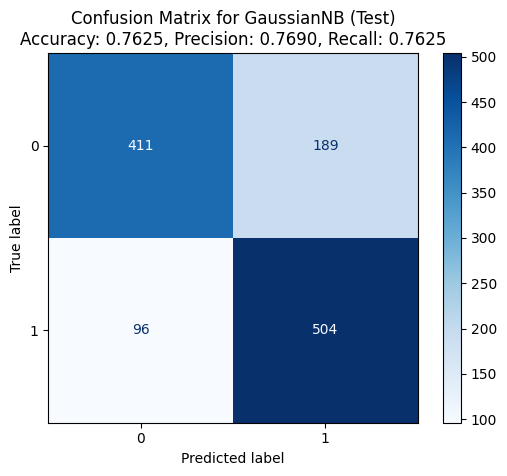

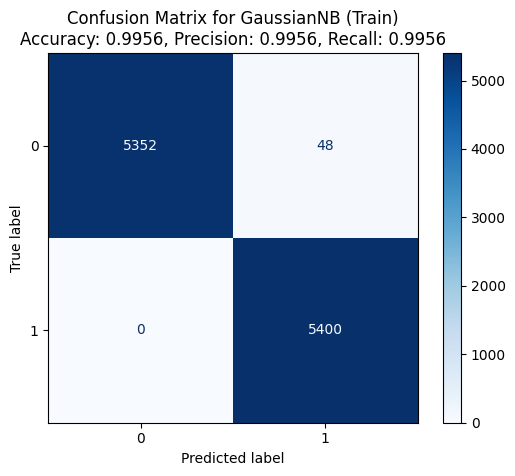

In [22]:
# Melakukan cross validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    fold = 1
    for train_idx, val_idx in kfold.split(X, y):
        X_train, X_test = X[train_idx], X[val_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

        # Fit model
        model.fit(X_train.toarray(), y_train)
        y_predTrain = model.predict(X_train.toarray())
        y_predTest = model.predict(X_test.toarray())

        # Calculate metrics
        accuracyTrain = accuracy_score(y_train, y_predTrain)
        accuracyTest = accuracy_score(y_test, y_predTest)
        precisionTrain = precision_score(y_train, y_predTrain, average='weighted')
        precisionTest = precision_score(y_test, y_predTest, average='weighted')
        recallTrain = recall_score(y_train, y_predTrain, average='weighted')
        recallTest = recall_score(y_test, y_predTest, average='weighted')

        # Save metrics
        cv_results[model_name]['accuracyTrain'].append(accuracyTrain)
        cv_results[model_name]['accuracyTest'].append(accuracyTest)
        cv_results[model_name]['precisionTrain'].append(precisionTrain)
        cv_results[model_name]['precisionTest'].append(precisionTest)
        cv_results[model_name]['recallTrain'].append(recallTrain)
        cv_results[model_name]['recallTest'].append(recallTest)

        # Save true and predicted values for confusion matrix
        cv_results[model_name]['y_test_all'].extend(y_test)
        cv_results[model_name]['y_predTest_all'].extend(y_predTest)
        cv_results[model_name]['y_train_all'].extend(y_train)
        cv_results[model_name]['y_predTrain_all'].extend(y_predTrain)

        # Print metrics for current fold
        print(f"Fold {fold} - {model_name}:")
        print(f"  Accuracy Test: {accuracyTest:.4f}")
        print(f"  Precision Test: {precisionTest:.4f}")
        print(f"  Recall Test: {recallTest:.4f}")
        print(f"  Accuracy Train: {accuracyTrain:.4f}")
        print(f"  Precision Train: {precisionTrain:.4f}")
        print(f"  Recall Train: {recallTrain:.4f}")
        print('-' * 50)
        fold += 1

# Menghitung rata-rata metrik
results_data = {
    'Model': [],
    'Mean Accuracy Test': [],
    'Mean Accuracy Train': [],
    'Mean Precision Test': [],
    'Mean Precision Train': [],
    'Mean Recall Test': [],
    'Mean Recall Train': []
}

for model_name, metrics in cv_results.items():
    results_data['Model'].append(model_name)
    results_data['Mean Accuracy Test'].append(np.mean(metrics['accuracyTest']) * 100)
    results_data['Mean Accuracy Train'].append(np.mean(metrics['accuracyTrain']) * 100)
    results_data['Mean Precision Test'].append(np.mean(metrics['precisionTest']) * 100)
    results_data['Mean Precision Train'].append(np.mean(metrics['precisionTrain']) * 100)
    results_data['Mean Recall Test'].append(np.mean(metrics['recallTest']) * 100)
    results_data['Mean Recall Train'].append(np.mean(metrics['recallTrain']) * 100)

# Membuat DataFrame dari data hasil
results_df = pd.DataFrame(results_data)
print("\nOverall Results:")
print(results_df)

# Menampilkan confusion matrix gabungan untuk setiap model
def plot_confusion_matrix(y_true, y_pred, model_name, dataset_type):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    plt.title(f'Confusion Matrix for {model_name} ({dataset_type})\n'
              f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')
    plt.show()

for model_name, metrics in cv_results.items():
    y_test_all = metrics['y_test_all']
    y_predTest_all = metrics['y_predTest_all']
    plot_confusion_matrix(y_test_all, y_predTest_all, model_name, 'Test')

    y_train_all = metrics['y_train_all']
    y_predTrain_all = metrics['y_predTrain_all']
    plot_confusion_matrix(y_train_all, y_predTrain_all, model_name, 'Train')

MULTINOMIAL NAIVE BAYES

Multinomial Naive Bayes
Cross-validation results (Accuracy): [75.         83.33333333 75.         80.55555556 80.55555556 80.55555556
 83.33333333 77.77777778 77.77777778 72.22222222]


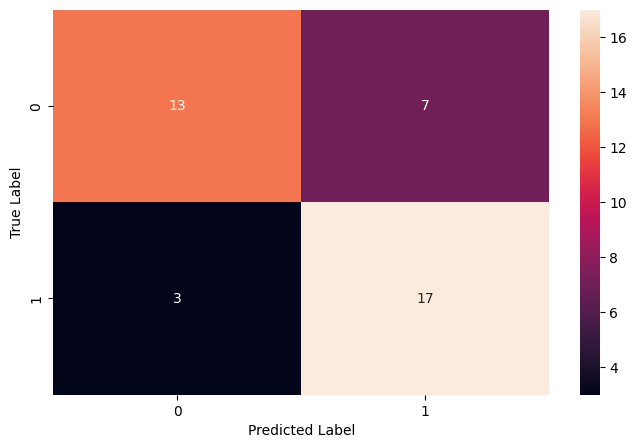

Accuracy: 75.0
Precision: 70.83333333333334
Recall: 85.0


In [23]:
    mnb = MultinomialNB()
    cv_results_mnb = cross_val_score(mnb, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Multinomial Naive Bayes")
    print("Cross-validation results (Accuracy):", cv_results_mnb * 100)
    

    mnb.fit(X_train, y_train)
    predict = mnb.predict(X_test)

    # Confusion matrix model
    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Skor akurasi model
    accuracy_mnb = accuracy_score(y_test, predict)
    print('Accuracy:', accuracy_mnb * 100)
    cv_accuracy_mnb.append(accuracy_mnb)

    # Precision
    precision_mnb = precision_score(y_test, predict)
    print('Precision:', precision_mnb * 100)
    cv_precision_mnb.append(precision_mnb)

    # Recall
    recall_mnb = recall_score(y_test, predict)
    print('Recall:', recall_mnb * 100)
    cv_recall_mnb.append(recall_mnb)

BERNOULLI NAIVE BAYES

Bernoulli Naive Bayes
Cross-validation results (Accuracy): [75.         80.55555556 66.66666667 80.55555556 75.         80.55555556
 83.33333333 72.22222222 77.77777778 77.77777778]


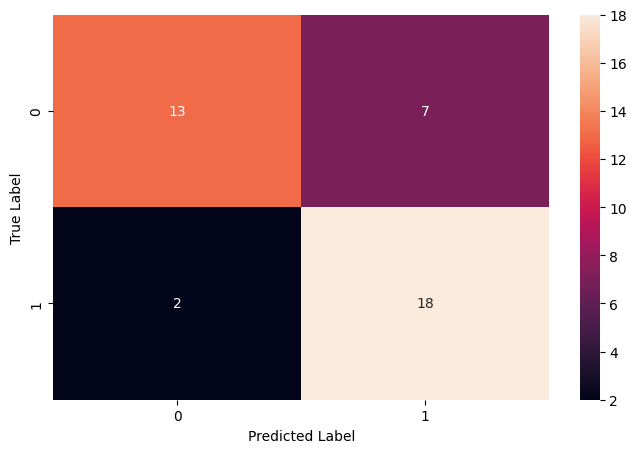

Accuracy: 77.5
Precision: 72.0
Recall: 90.0


In [24]:
    bnb = BernoulliNB()
    cv_results_bnb = cross_val_score(bnb, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Bernoulli Naive Bayes")
    print("Cross-validation results (Accuracy):", cv_results_bnb * 100)
    

    bnb.fit(X_train, y_train)
    predict_bnb = bnb.predict(X_test)

    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict_bnb), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    accuracy_bnb = accuracy_score(y_test, predict_bnb)
    print('Accuracy:', accuracy_bnb * 100)
    cv_accuracy_bnb.append(accuracy_bnb)

    precision_bnb = precision_score(y_test, predict_bnb)
    print('Precision:', precision_bnb * 100)
    cv_precision_bnb.append(precision_bnb)

    recall_bnb = recall_score(y_test, predict_bnb)
    print('Recall:', recall_bnb * 100)
    cv_recall_bnb.append(recall_bnb)

GAUSSIAN NAIVE BAYES

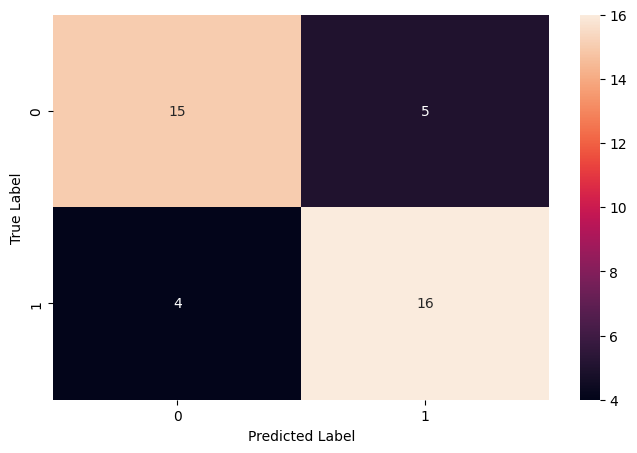

Accuracy: 77.5
Precision: 76.19047619047619
Recall: 80.0


In [25]:

    gnb = GaussianNB()
    gnb.fit(X_train.toarray(), y_train)
    predict_gnb = gnb.predict(X_test.toarray())

    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict_gnb), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    accuracy_gnb = accuracy_score(y_test, predict_gnb)
    print('Accuracy:', accuracy_gnb * 100)
    cv_accuracy_gnb.append(accuracy_gnb)

    precision_gnb = precision_score(y_test, predict_gnb)
    print('Precision:', precision_gnb * 100)
    cv_precision_gnb.append(precision_gnb)

    recall_gnb = recall_score(y_test, predict_gnb)
    print('Recall:', recall_gnb * 100)
    cv_recall_gnb.append(recall_gnb)

HASIL

In [26]:
results_data = {
    'Model': ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB'],
    'Mean Accuracy': [np.mean(cv_accuracy_mnb)*100, np.mean(cv_accuracy_bnb)*100, np.mean(cv_accuracy_gnb)*100],
    'Mean Precision': [np.mean(cv_precision_mnb)*100, np.mean(cv_precision_bnb)*100, np.mean(cv_precision_gnb)*100],
    'Mean Recall': [np.mean(cv_recall_mnb)*100, np.mean(cv_recall_bnb)*100, np.mean(cv_recall_gnb)*100]
}

results_df = pd.DataFrame(results_data)

# Menampilkan hasil dalam satu tabel
print(results_df)

            Model  Mean Accuracy  Mean Precision  Mean Recall
0  Multinomial NB           75.0       70.833333         85.0
1    Bernoulli NB           77.5       72.000000         90.0
2     Gaussian NB           77.5       76.190476         80.0


EVALUASI TRAIN

MULTINOMIAL

Multinomial Naive Bayes
Cross-validation results (Accuracy): [75.         83.33333333 75.         80.55555556 80.55555556 80.55555556
 83.33333333 77.77777778 77.77777778 72.22222222]


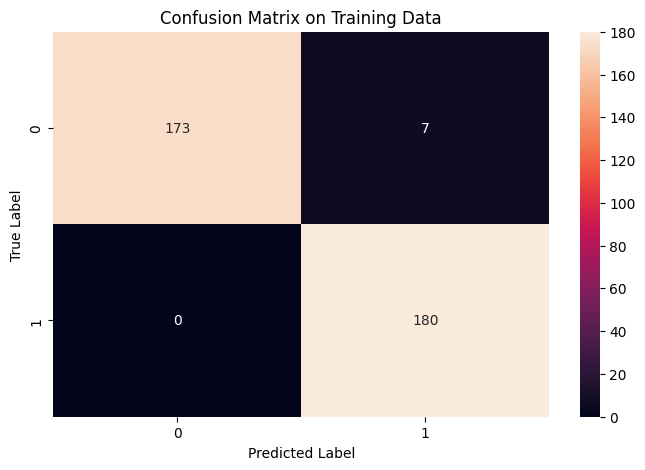

Training Accuracy: 98.05555555555556
Training Precision: 96.2566844919786
Training Recall: 100.0


In [27]:
mnb = MultinomialNB()

# Evaluasi dengan cross-validation pada data train
cv_results_mnb = cross_val_score(mnb, X_train, y_train, cv=kfold, scoring='accuracy')
print("Multinomial Naive Bayes")
print("Cross-validation results (Accuracy):", cv_results_mnb * 100)

# Melatih model dengan data train
mnb.fit(X_train, y_train)

# Prediksi pada data train
train_predict = mnb.predict(X_train)

# Confusion matrix untuk data train
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, train_predict), annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Training Data")
plt.show()

# Skor akurasi model pada data train
train_accuracy_mnb = accuracy_score(y_train, train_predict)
print('Training Accuracy:', train_accuracy_mnb * 100)

# Precision pada data train
train_precision_mnb = precision_score(y_train, train_predict)
print('Training Precision:', train_precision_mnb * 100)

# Recall pada data train
train_recall_mnb = recall_score(y_train, train_predict)
print('Training Recall:', train_recall_mnb * 100)

# Menyimpan hasil ke dalam list
cv_accuracy_mnb.append(train_accuracy_mnb)
cv_precision_mnb.append(train_precision_mnb)
cv_recall_mnb.append(train_recall_mnb)

BERNOULLI

Bernoulli Naive Bayes
Cross-validation results (Accuracy): [75.         80.55555556 66.66666667 80.55555556 75.         80.55555556
 83.33333333 72.22222222 77.77777778 77.77777778]


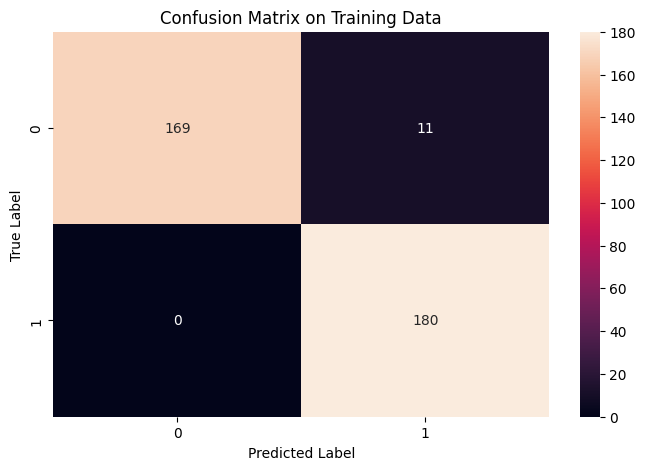

Training Accuracy: 96.94444444444444
Training Precision: 94.24083769633508
Training Recall: 100.0


In [28]:
bnb = BernoulliNB()

# Evaluasi dengan cross-validation pada data train
cv_results_bnb = cross_val_score(bnb, X_train, y_train, cv=kfold, scoring='accuracy')
print("Bernoulli Naive Bayes")
print("Cross-validation results (Accuracy):", cv_results_bnb * 100)

# Melatih model dengan data train
bnb.fit(X_train, y_train)

# Prediksi pada data train
train_predict_bnb = bnb.predict(X_train)

# Confusion matrix untuk data train
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, train_predict_bnb), annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Training Data")
plt.show()

# Skor akurasi model pada data train
train_accuracy_bnb = accuracy_score(y_train, train_predict_bnb)
print('Training Accuracy:', train_accuracy_bnb * 100)

# Precision pada data train
train_precision_bnb = precision_score(y_train, train_predict_bnb)
print('Training Precision:', train_precision_bnb * 100)

# Recall pada data train
train_recall_bnb = recall_score(y_train, train_predict_bnb)
print('Training Recall:', train_recall_bnb * 100)

# Menyimpan hasil ke dalam list
cv_accuracy_bnb.append(train_accuracy_bnb)
cv_precision_bnb.append(train_precision_bnb)
cv_recall_bnb.append(train_recall_bnb)

GAUSSIAN

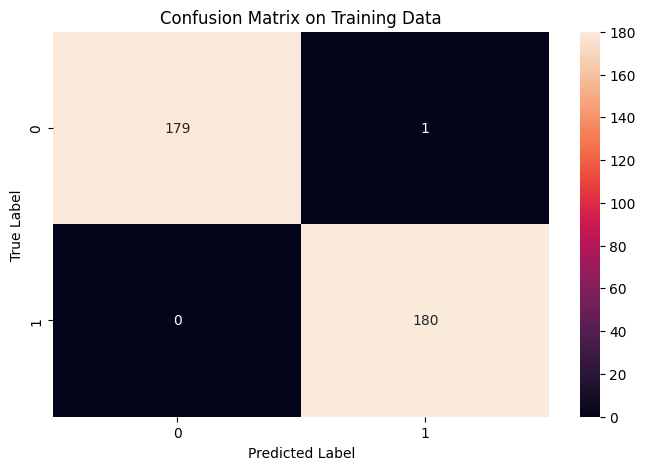

Training Accuracy: 99.72222222222223
Training Precision: 99.4475138121547
Training Recall: 100.0


In [29]:
gnb = GaussianNB()

# Melatih model dengan data train
gnb.fit(X_train.toarray(), y_train)

# Prediksi pada data train
train_predict_gnb = gnb.predict(X_train.toarray())

# Confusion matrix untuk data train
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, train_predict_gnb), annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Training Data")
plt.show()

# Skor akurasi model pada data train
train_accuracy_gnb = accuracy_score(y_train, train_predict_gnb)
print('Training Accuracy:', train_accuracy_gnb * 100)

# Precision pada data train
train_precision_gnb = precision_score(y_train, train_predict_gnb)
print('Training Precision:', train_precision_gnb * 100)

# Recall pada data train
train_recall_gnb = recall_score(y_train, train_predict_gnb)
print('Training Recall:', train_recall_gnb * 100)

# Menyimpan hasil ke dalam list
cv_accuracy_gnb.append(train_accuracy_gnb)
cv_precision_gnb.append(train_precision_gnb)
cv_recall_gnb.append(train_recall_gnb)

In [30]:
results_data = {
    'Model': ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB'],
    'Mean Accuracy': [np.mean(cv_accuracy_mnb) * 100, np.mean(cv_accuracy_bnb) * 100, np.mean(cv_accuracy_gnb) * 100],
    'Mean Precision': [np.mean(cv_precision_mnb) * 100, np.mean(cv_precision_bnb) * 100, np.mean(cv_precision_gnb) * 100],
    'Mean Recall': [np.mean(cv_recall_mnb) * 100, np.mean(cv_recall_bnb) * 100, np.mean(cv_recall_gnb) * 100]
}

# Membuat DataFrame dari data hasil
results_df = pd.DataFrame(results_data)

# Menampilkan hasil dalam satu tabel
print(results_df)

            Model  Mean Accuracy  Mean Precision  Mean Recall
0  Multinomial NB      82.685185       79.307784    90.000000
1    Bernoulli NB      83.981481       79.413613    93.333333
2     Gaussian NB      84.907407       83.942822    86.666667
